<a href="https://colab.research.google.com/github/costpetrides/Air-pollution-COVID-19-impact/blob/main/Lin_Reg/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚠️ Warning:

Our **data** is by far **non-Linear**, so we expect our **linear** regression model to perform ....


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LinearRegression        # Linear Regession  :)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
# Import the data!

df=pd.read_csv('forestfires.csv')
cols = df.columns.tolist()
df.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
df = pd.get_dummies(df, columns=['month'], drop_first=True)
df = pd.get_dummies(df, columns=['day'], drop_first=True)

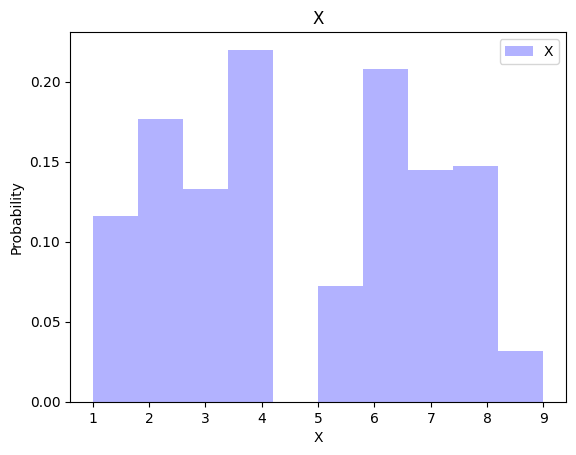

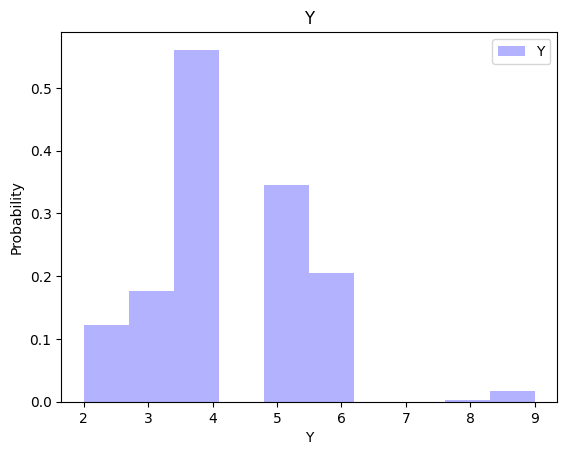

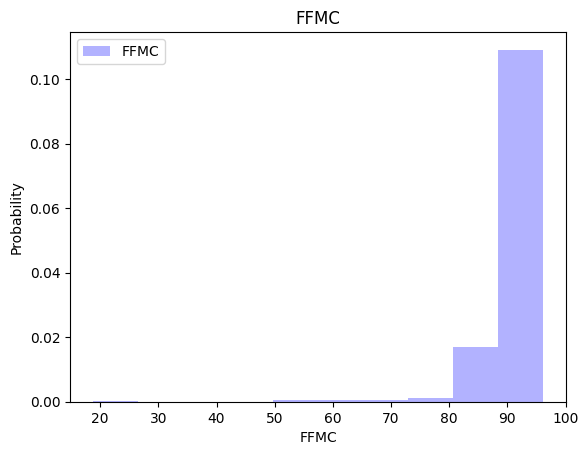

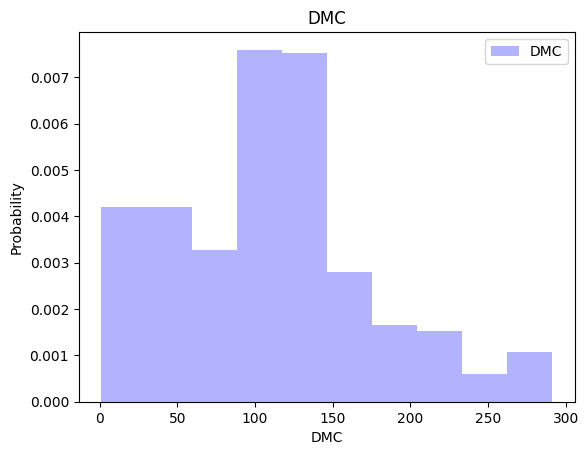

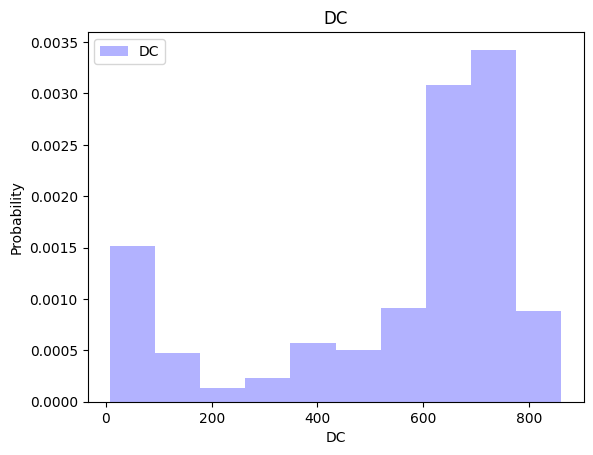

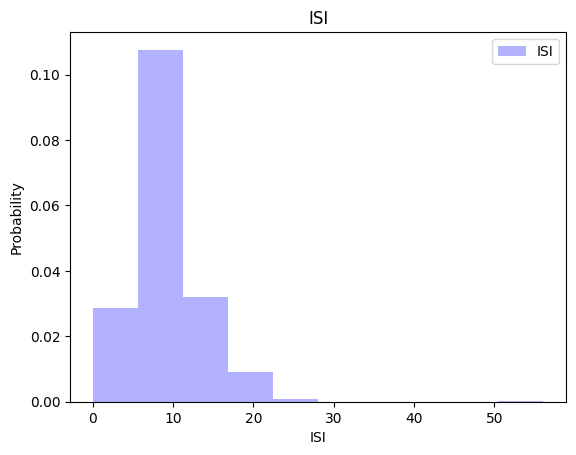

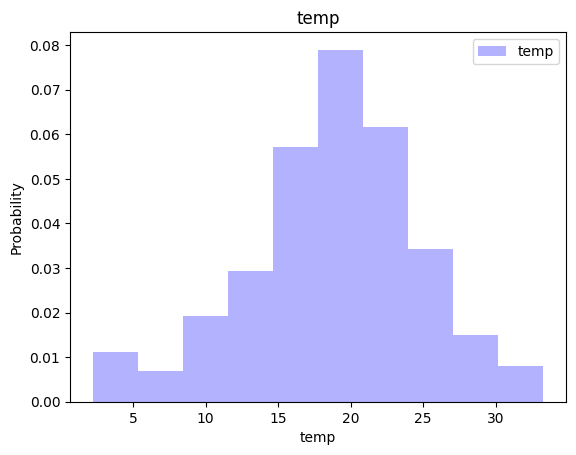

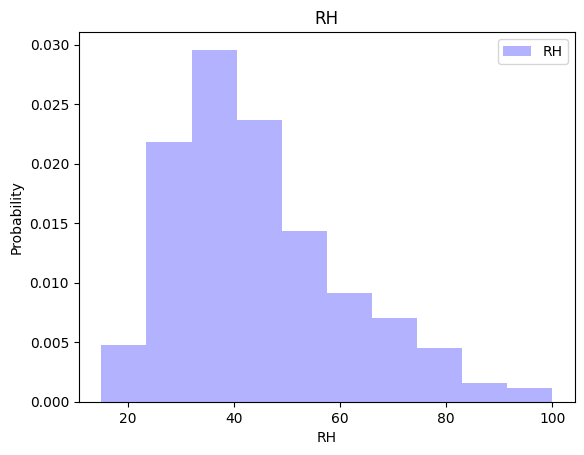

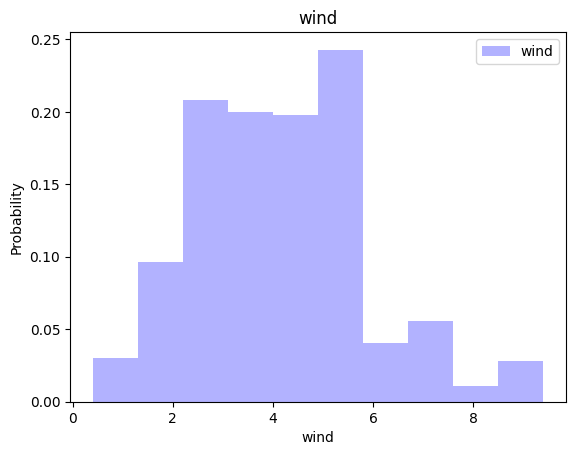

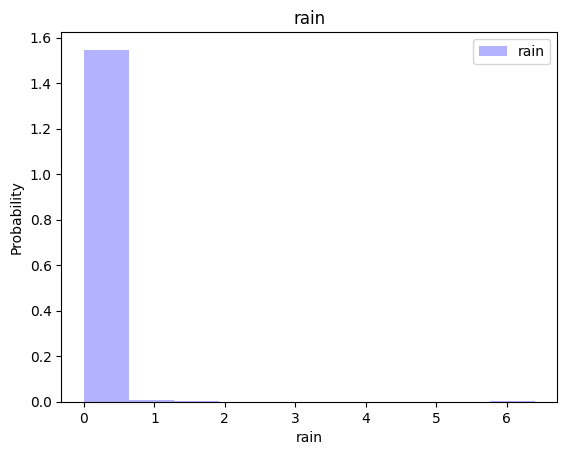

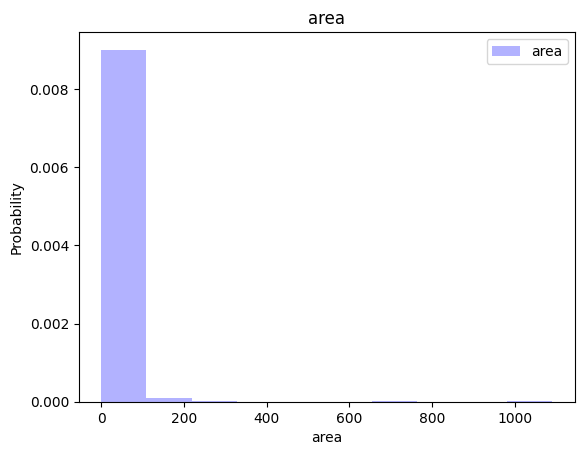

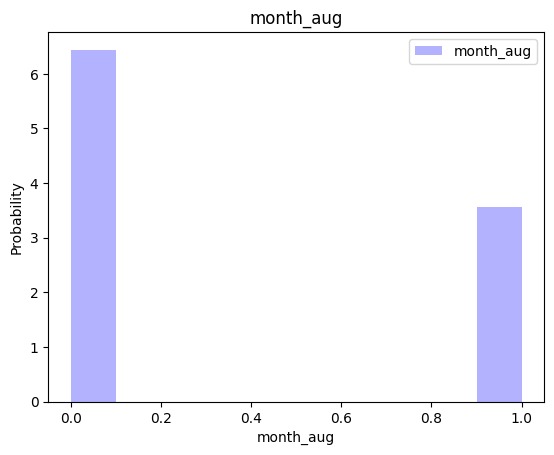

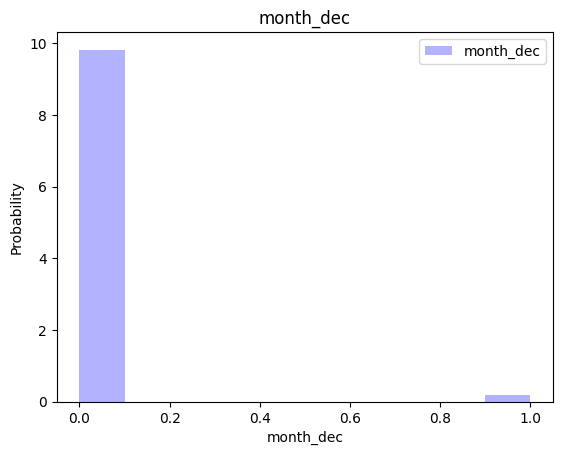

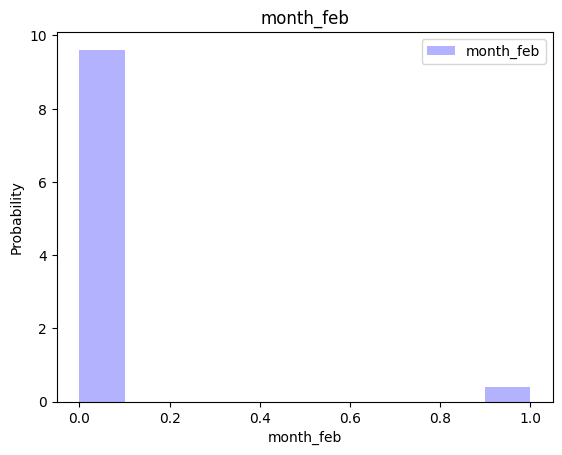

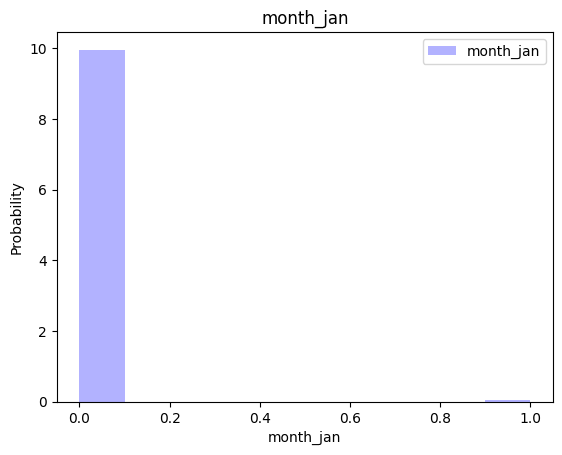

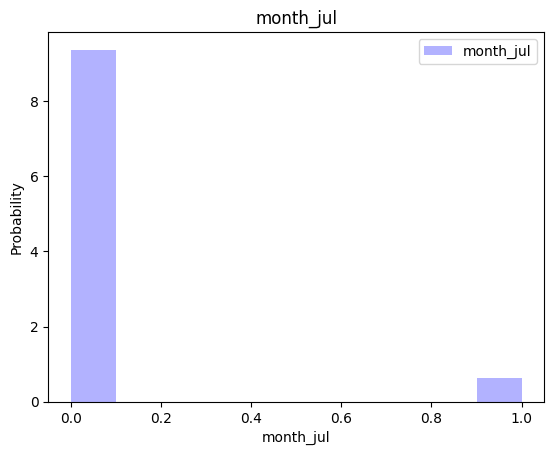

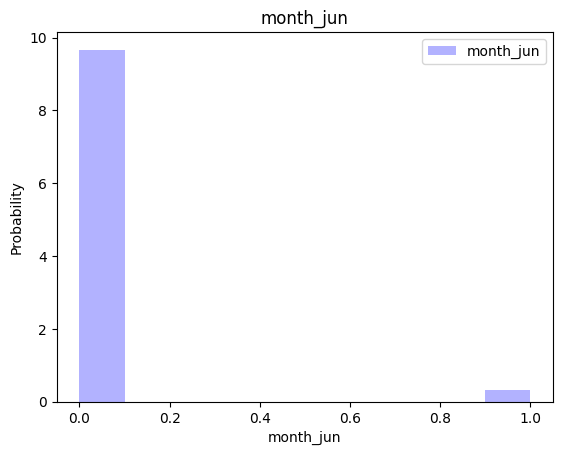

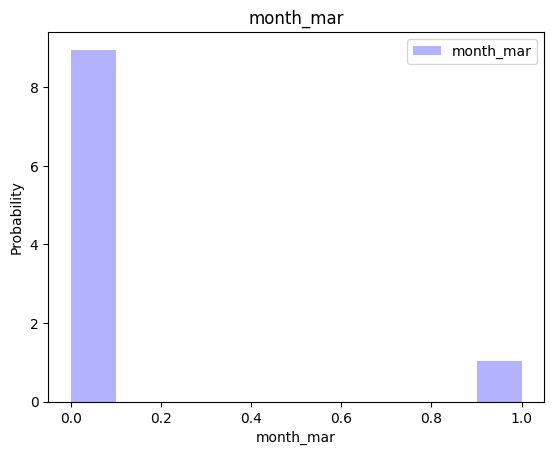

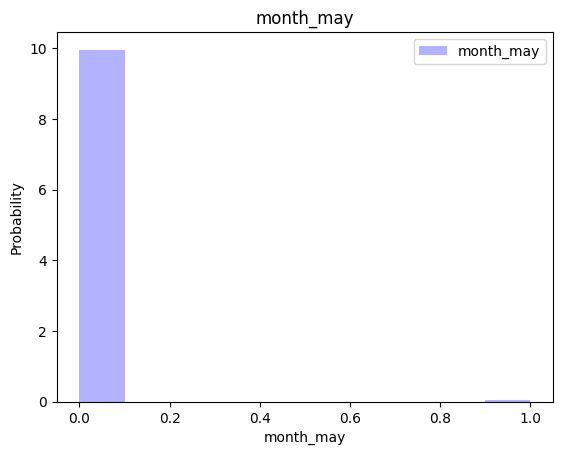

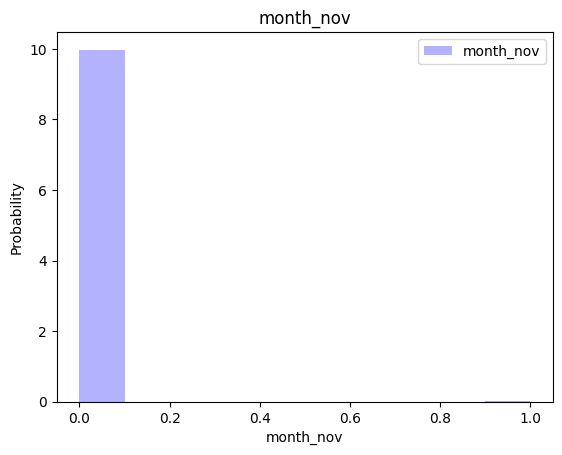

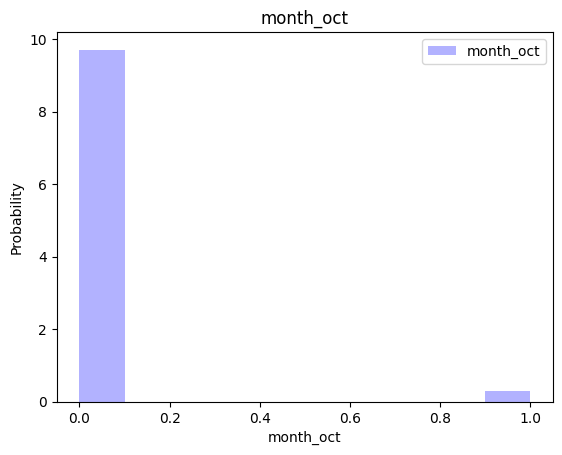

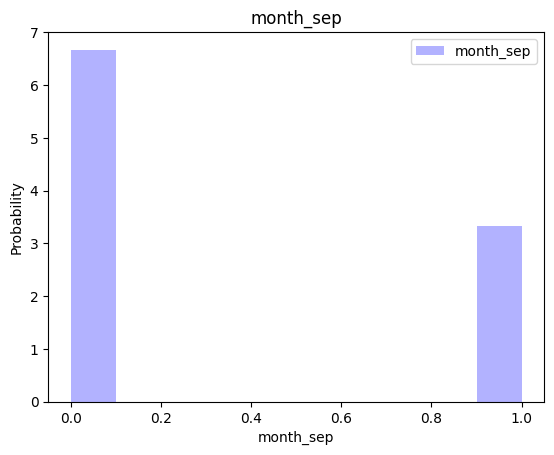

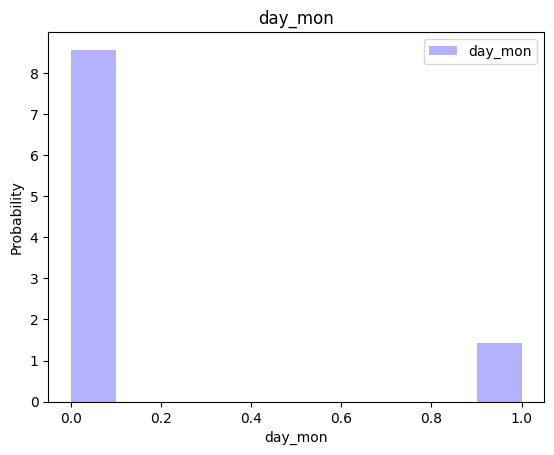

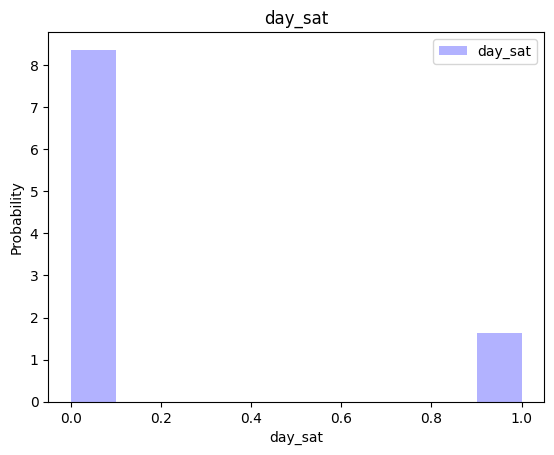

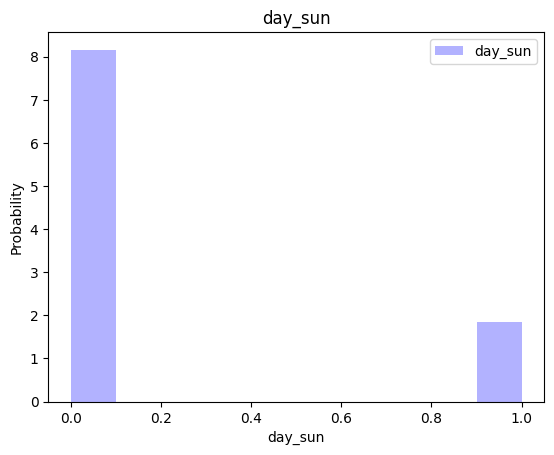

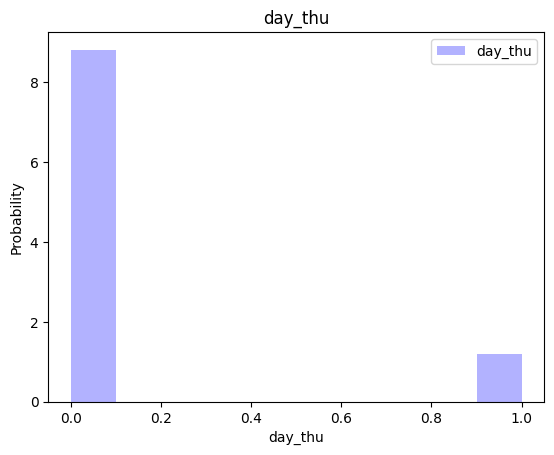

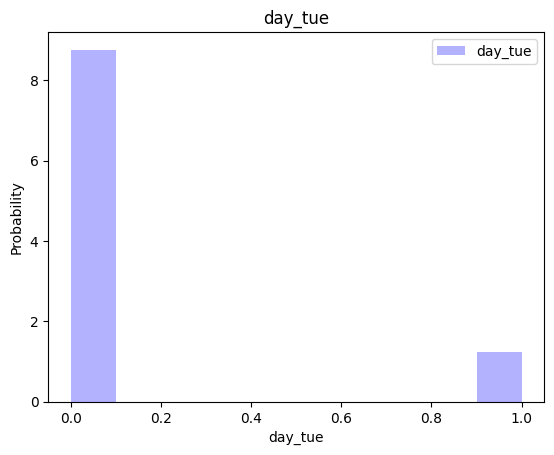

In [6]:
cols = df.columns.tolist()    # Here we make a list with all labels names

# Data visualization
for label in cols[:-1]:
  plt.hist(df[label], color='blue', label=label, alpha=0.3, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [7]:
# First, shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# Make "area" the last column ---> Target !!
df = df[[col for col in df.columns if col != 'area'] + ['area']]
df.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area
0,4,5,92.4,96.2,739.4,8.6,18.6,24,5.8,0.0,...,0,0,1,0,0,0,1,0,0,0.0
1,6,3,84.9,27.5,353.5,3.4,4.2,51,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0.0
2,6,5,90.2,96.9,624.2,8.9,14.7,59,5.8,0.0,...,0,0,0,0,1,0,0,0,0,0.0
3,3,4,92.1,99.0,745.3,9.6,17.4,57,4.5,0.0,...,0,0,1,0,0,0,0,0,0,0.0
4,2,2,91.7,114.3,661.3,6.3,18.6,44,4.5,0.0,...,0,0,0,0,0,0,1,0,0,0.0


In [8]:
# We split the data into training (60%), validation (20%), and test (20%) sets

train_end = int(0.6 * len(df))
valid_end = int(0.8 * len(df))

train = df[:train_end]
valid = df[train_end:valid_end]
test = df[valid_end:]

train = df[:train_end]
valid = df[train_end:valid_end]
test = df[valid_end:]

In [9]:
# Scaling and Class balancing :)

def preprocess_data(dataframe):
    # Separate features and target variable
    x = dataframe.iloc[:, :-1].values
    y = dataframe.iloc[:, -1].values

    return x, y


# Apply preprocessing to your datasets
train_x, train_y = preprocess_data(train, )
valid_x, valid_y = preprocess_data(valid)
test_x, test_y = preprocess_data(test)


In [11]:
# Finally we can train our model !

lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression()

In [13]:
pred_y = lr_model.predict(test_x)

# Evaluate the model
mse = mean_squared_error(test_y, pred_y)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 7020.73


In [16]:
# Assuming Knn_model is your trained KNN regressor
pred_y = lr_model.predict(test_x)

# Evaluate the model
mae = mean_absolute_error(test_y, pred_y)
mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

# Display the custom regression report
print("Custom Regression Report:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Custom Regression Report:
Mean Absolute Error: 27.62
Mean Squared Error: 7020.73
R-squared (R2): -0.03
